In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")

# Sample Output: ID | DEFECTS

In [3]:
train.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [5]:
continuos_features = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
discrete_features = ['lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment']

In [6]:
train.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


### Variables with discrete values: 
- 

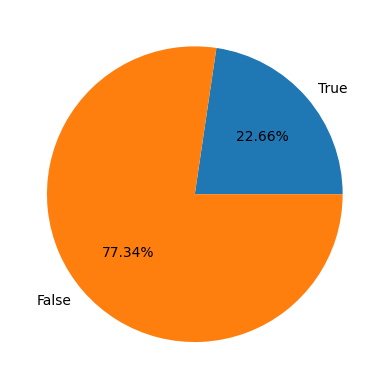

In [7]:
plt.pie([len(train[train['defects']==True]), len(train[train['defects']==False])], labels=['True', 'False'], autopct = '%.2f%%')
clear_output()

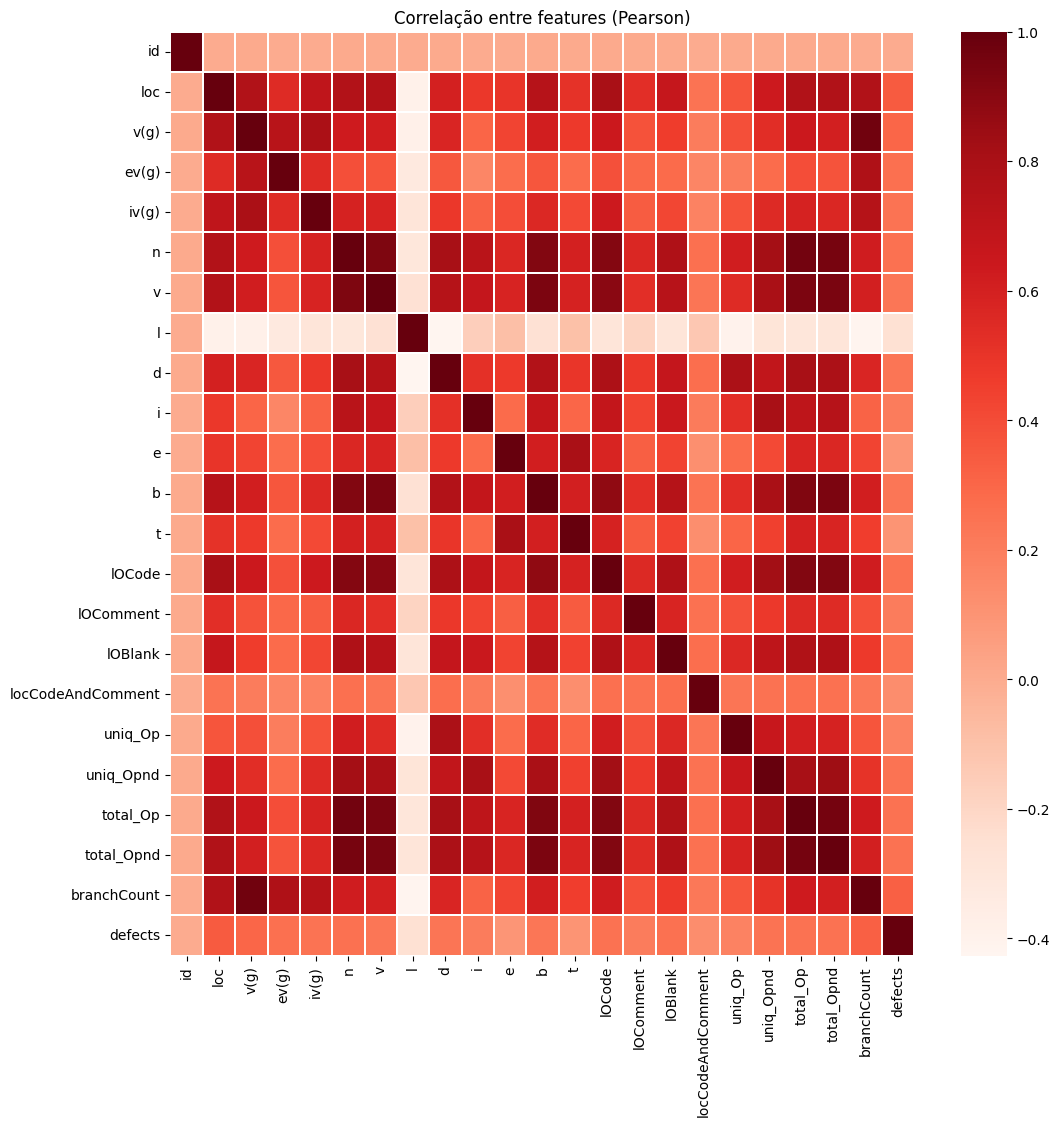

In [8]:
plt.figure(figsize = (12,12))
plt.title('Correlação entre features (Pearson)')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

<Figure size 640x480 with 0 Axes>

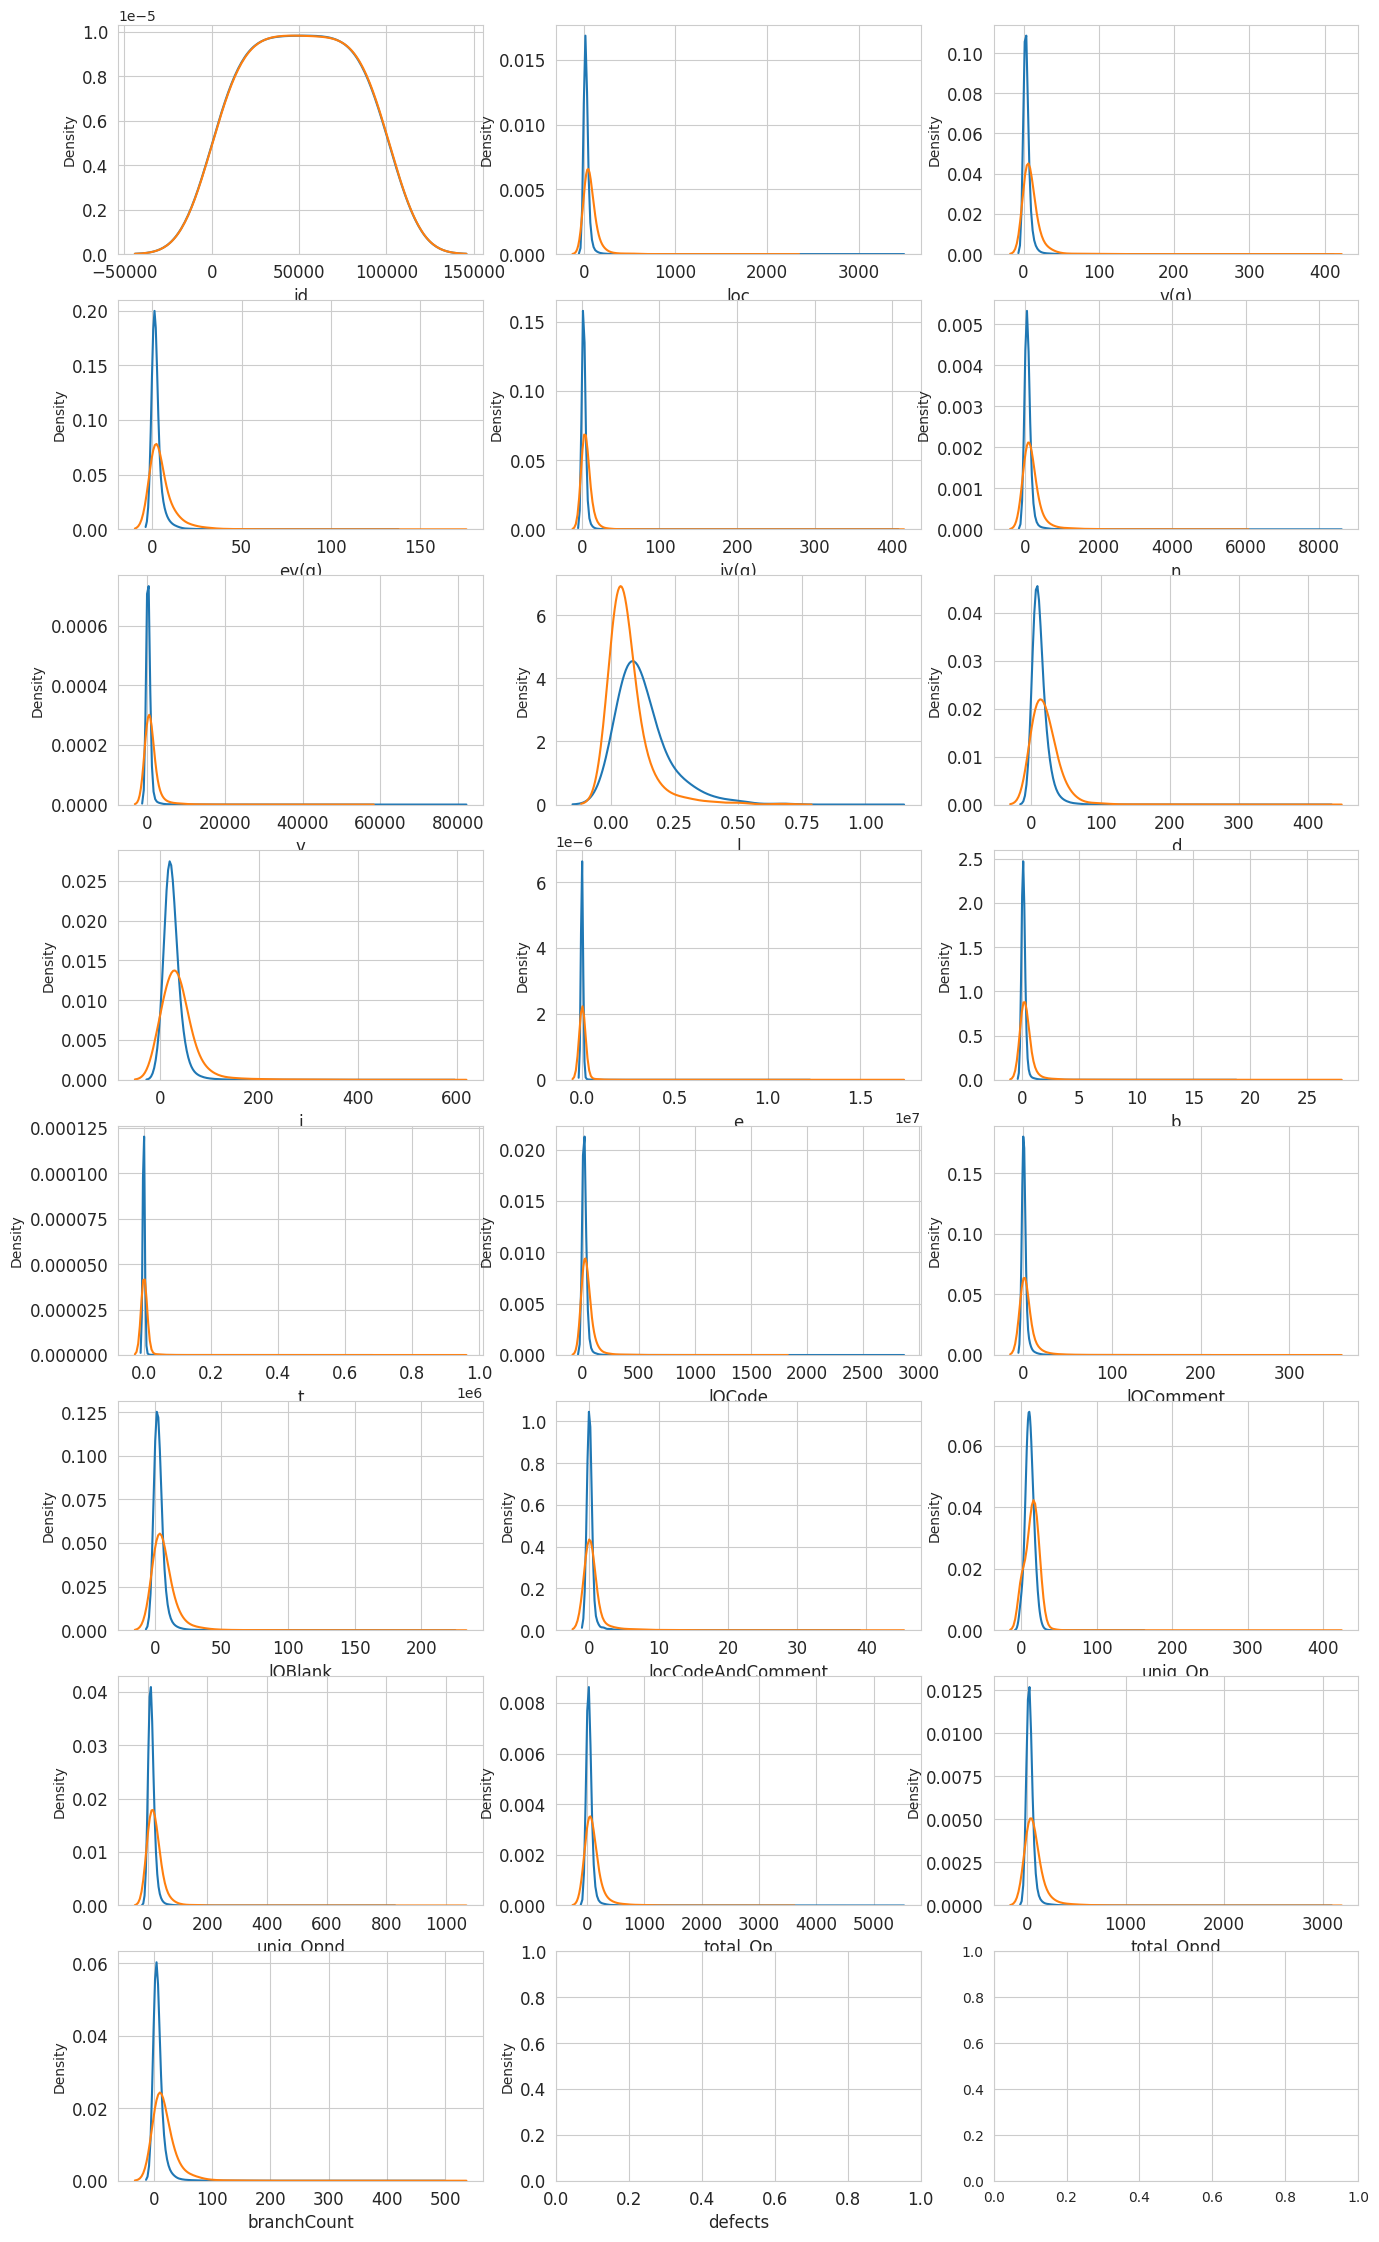

In [9]:
var = train.columns.values

i = 0
t0 = train.loc[train['defects'] == False]
t1 = train.loc[train['defects'] == True]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,3,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = False")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = True")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
clear_output()
plt.show();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


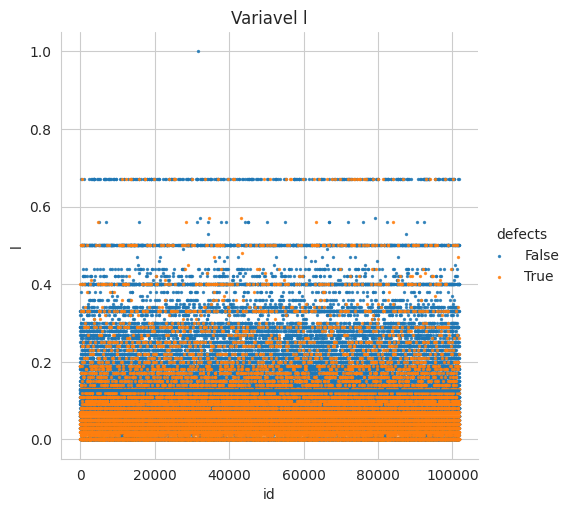

In [10]:
ax = sns.lmplot(x='id', y='l',data=train, hue='defects', fit_reg=True,scatter_kws={'s':2}).set(title='Variavel l')

#### Those 2 plots above show a good selectivity in terms of distribution for the variable **l**, but still a high correlation between **defects** and the rest of the features

For that, I'll try the following approaches:

- **Create Interaction Terms:** If two features are highly correlated, creating an interaction term (multiplying the two features) might help the model capture their combined effect.
- **Binning or Discretization:** Convert continuous features into categorical features by binning them. This can sometimes capture non-linear relationships more effectively.